<a href="https://colab.research.google.com/github/HilmyMhiii/PCVK_Genap_2023/blob/main/Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection
Metode yang digunakan :

Template Matching

Edge Detection

Corner Detection

Grid Detection

Contour Detection

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv 
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import match_template
from skimage.color import rgb2gray

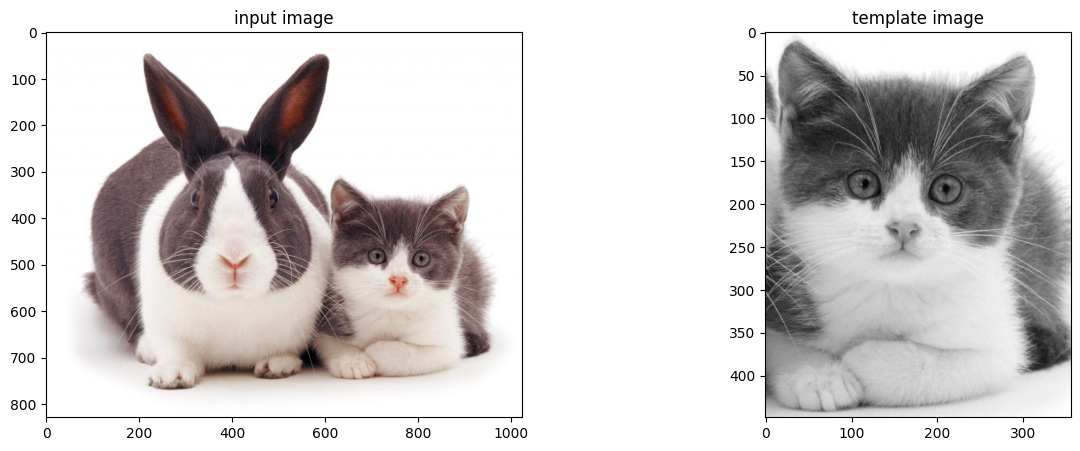

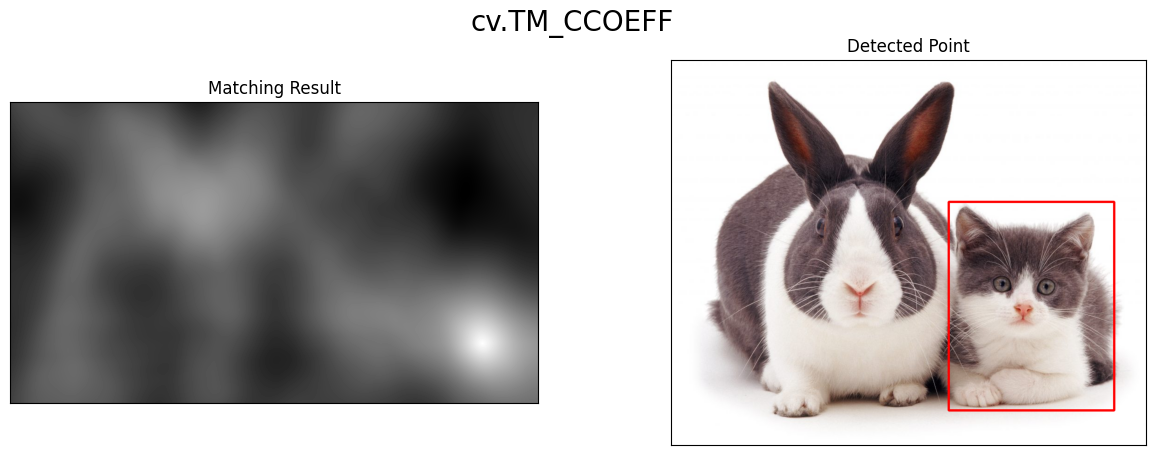

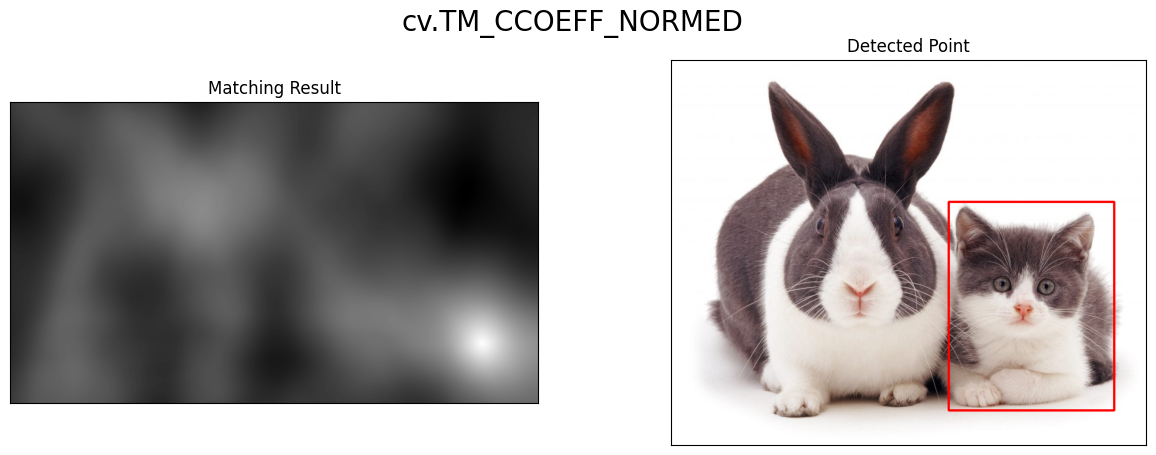

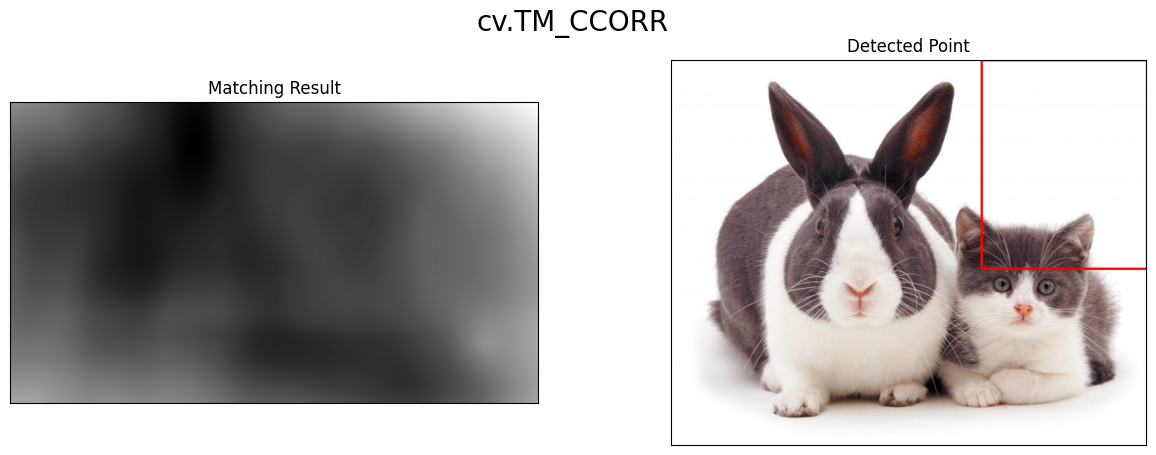

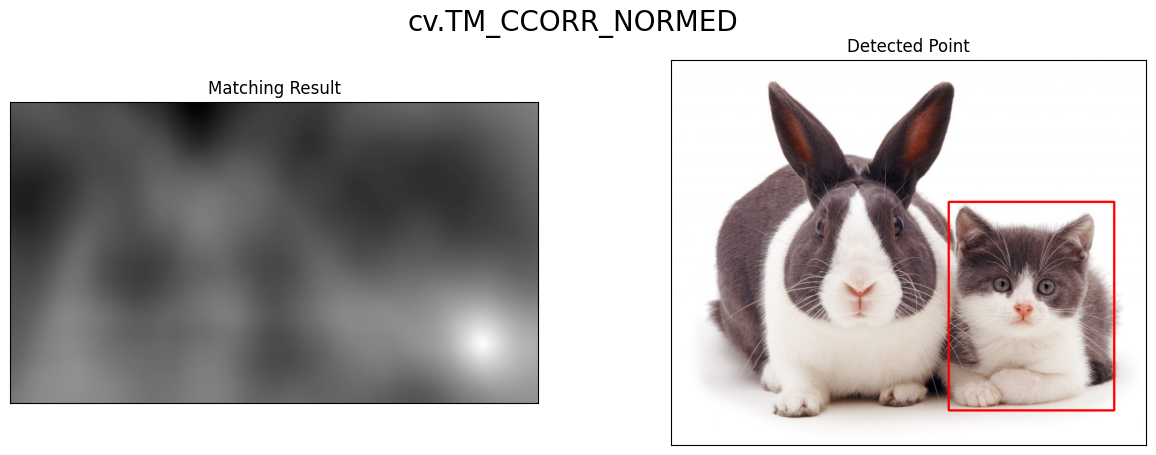

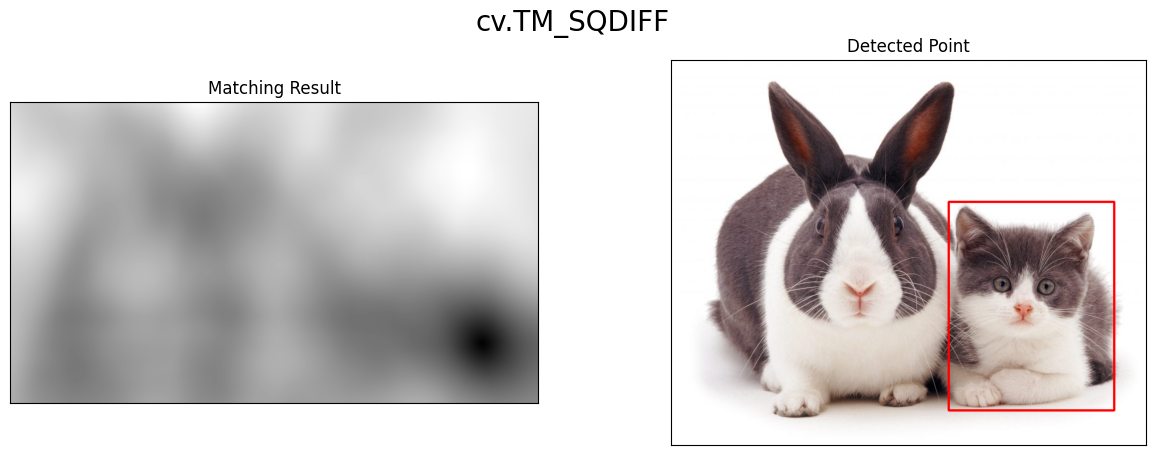

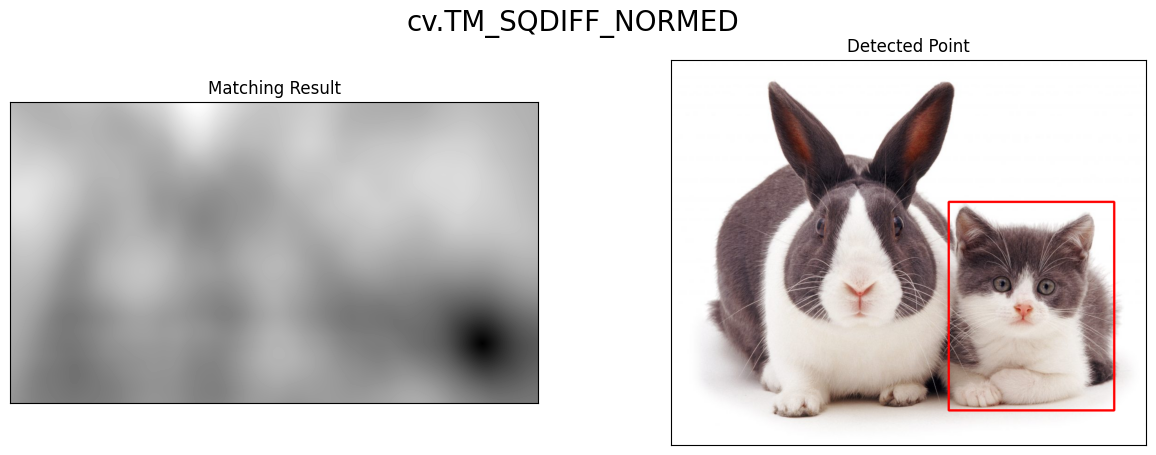

In [4]:
#No 2

# Memuat gambar 'cats_and_bunnies.jpg' sebagai citra input menggunakan opencv
img = cv.imread('/content/drive/MyDrive/PCVK/cats_and_bunnies.jpg')
# Mengubah citra input menjadi citra grayscale 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# Meng-copy citra input menjadi citra img2
img2 = img.copy()
# Memuat gambar 'cat2_templatejpg.jpg' sebagai template menggunakan opencv
template = cv.imread('/content/drive/MyDrive/PCVK/cat2_templatejpg.jpg', 0)
# Mengambil nilai width(w) dan height(h) dari template
w, h = template.shape[::-1]
# Membuat 2 plot untuk citra input dan template menggunakan matplotlib
f, axarr = plt. subplots(1,2,figsize=(15,5))  
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# Menentukan metode-metode yang akan digunakan untuk mencocokkan template dengan citra input
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

# Looping untuk setiap metode yang digunakan
for meth in methods:
    # Meng-copy citra input (img2) agar tidak merubah citra asli
    img = img2.copy()
    # Mengambil metode yang akan digunakan
    method = eval(meth)
    # Mencocokkan template dengan citra input menggunakan metode yang dipilih
    res = cv.matchTemplate(img_gray,template,method)
    # Mencari nilai minimum, nilai maksimum, posisi nilai minimum, dan posisi nilai maksimum
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # Jika metode yang digunakan adalah TM_SQDIFF atau TM_SQDIFF_NORMED, maka nilai minimum menjadi posisi kiri atas
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    # Jika tidak, maka nilai maksimum menjadi posisi kiri atas
    else:
        top_left = max_loc
    # Menghitung posisi kanan bawah dengan menjumlahkan posisi kiri atas dengan nilai width(w) dan height(h)
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Membuat kotak pada citra input sesuai dengan posisi kiri atas dan kanan bawah yang telah dihitung
    cv.rectangle(img, top_left, bottom_right,(0,0,255),3)
    # Menampilkan gambar hasil matching
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    # Menampilkan gambar hasil matching pada citra input
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

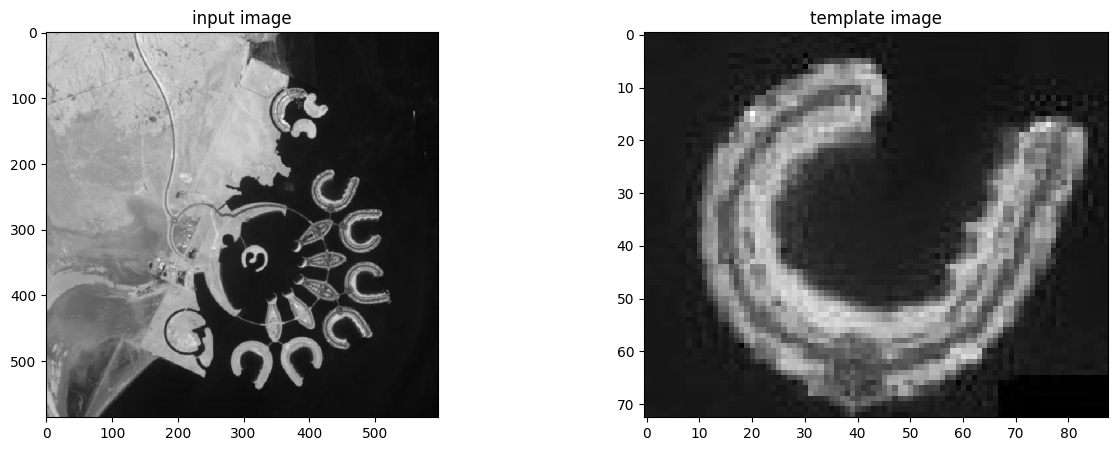

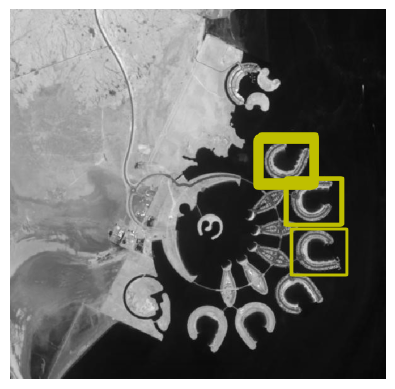

In [5]:
# No 3

# Load the input image and template
image = rgb2gray(imread('/content/drive/MyDrive/PCVK/bahrain.jpg'))
template = rgb2gray(imread('/content/drive/MyDrive/PCVK/bahrain-template.jpg'))

# mencari kemiripan antara gambar input dengan gambar template menggunakan fungsi match_template()
result = match_template(image, template)

# digunakan untuk menampilkan gambar input dan gambar template dalam sebuah plot dengan menggunakan subplots() dan imshow()
f, axarr = plt. subplots(1,2,figsize=(15,5)) 
axarr[0].imshow(image,cmap=plt.cm.gray), axarr[0].set_title("input image") 
axarr[1].imshow(template,cmap=plt.cm.gray), axarr[1].set_title("template image")

# Tentukan threshold untuk menentukan hasil match
threshold = 0.5
# untuk mencari lokasi kemiripan antara gambar input dan gambar template dengan nilai korelasi yang lebih besar atau sama dengan nilai threshold
locations = np.where(result >= threshold)

# Plot hasil match
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)
ax.set_axis_off()
height, width = template.shape
for loc in zip(*locations[::-1]):
    rect = plt.Rectangle(loc, width, height, edgecolor='y', facecolor='none')
    ax.add_patch(rect)
plt.show()

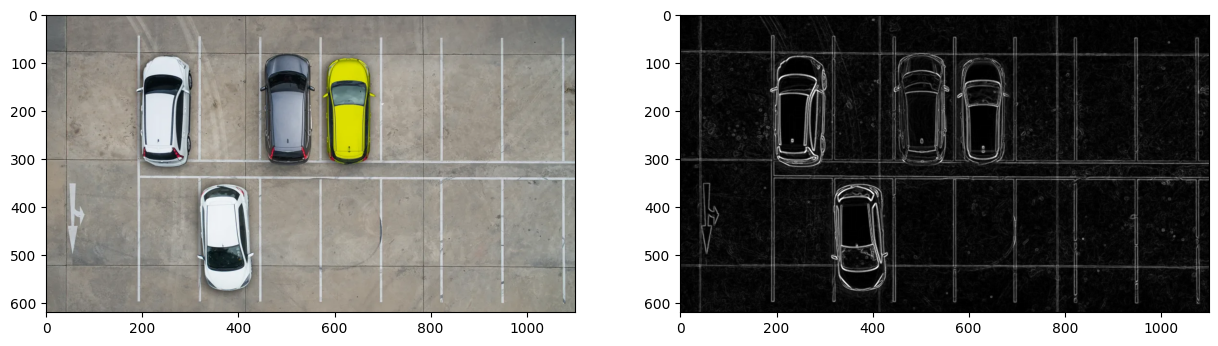

In [6]:
#No 4
# Sobel Edge Detection

img_car = cv.imread('/content/drive/MyDrive/PCVK/car-park.jpg') 

# merubah RGB ke Grayscale
gray = cv.cvtColor(img_car, cv.COLOR_BGR2GRAY)

# menghapus noise
img_n = cv.GaussianBlur(gray,(3,3),0)

# Menerapkan filter Gaussian untuk menghilangkan noise pada gambar grayscale yang telah dibuat sebelumnya dan menyimpan hasilnya dalam variabel img_n
img_sobelx = cv.Sobel(img_n, cv.CV_64F, 1, 0, ksize=3)
img_sobely = cv.Sobel(img_n, cv.CV_64F, 0, 1, ksize=3)

# Menerapkan filter Sobel secara horizontal dan vertikal pada gambar yang telah di-blur 
img_sobelxy = cv.addWeighted(cv.convertScaleAbs(img_sobelx), 0.5, cv.convertScaleAbs(img_sobely), 0.5, 0)

# Membuat plot dengan ukuran 15x5 dengan 1 baris dan 2 kolom dan menyimpannya dalam variabel f dan axarr
f, axarr = plt. subplots(1,2,figsize=(15,5))
plt.subplot(121),plt.imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(img_sobelxy, cmap = 'gray')
axarr[1].imshow(cv.cvtColor(img_sobelxy, cv.COLOR_BGR2RGB))
     

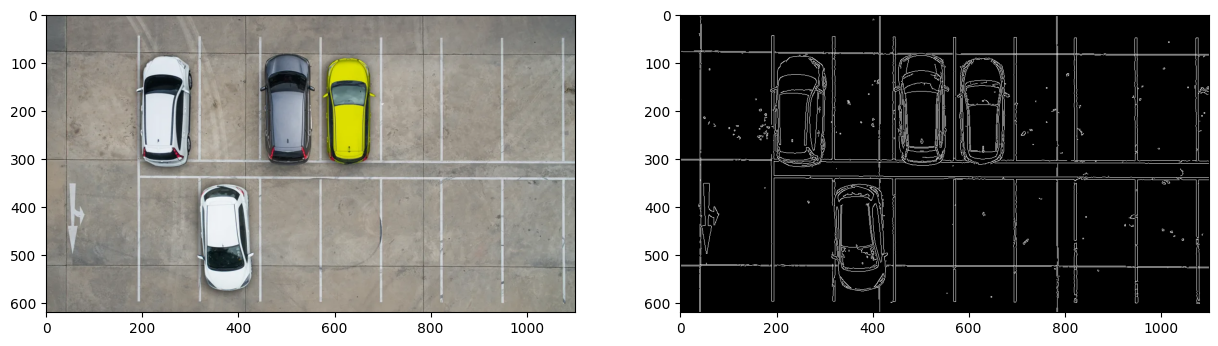

In [7]:
# Canny edge detection

edged = cv.Canny(img_car, 100, 200)

f, axarr = plt.subplots(1,2,figsize=(15,5))
plt.subplot(121), plt.imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
axarr[0].imshow(cv.cvtColor(img_car, cv.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(edged, cmap = 'gray')
axarr[1].imshow(cv.cvtColor(edged, cv.COLOR_BGR2RGB))

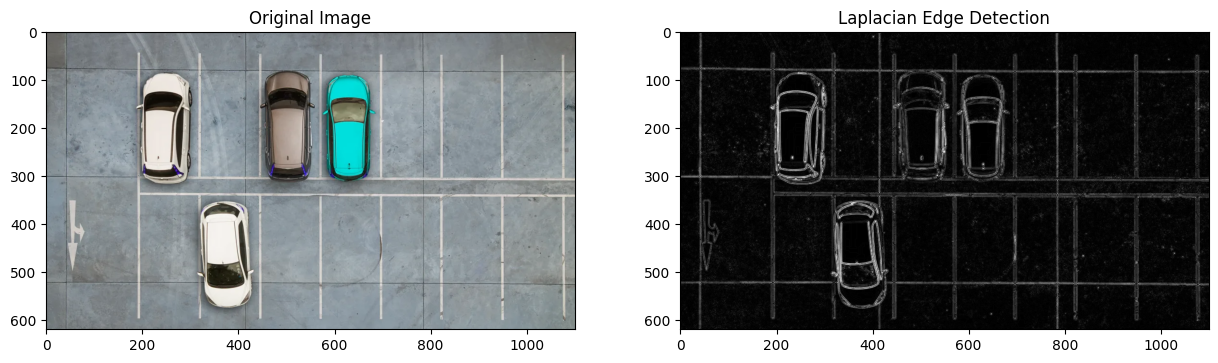

In [8]:
# Load the image
image_original = cv.imread('/content/drive/MyDrive/PCVK/car-park.jpg', cv.IMREAD_COLOR)

# Convert the image to grayscale
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
img = cv.GaussianBlur(image_gray, (3, 3), 0)

# Apply Laplacian filter
filtered_image = cv.Laplacian(img, ksize=3, ddepth=cv.CV_16S)

# Convert the result to absolute values
filtered_image = cv.convertScaleAbs(filtered_image)

# Display the original and filtered images
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 15))
ax1.title.set_text('Original Image')
ax1.imshow(image_original)
ax2.title.set_text('Laplacian Edge Detection')
ax2.imshow(filtered_image, cmap='gray')
plt.show()

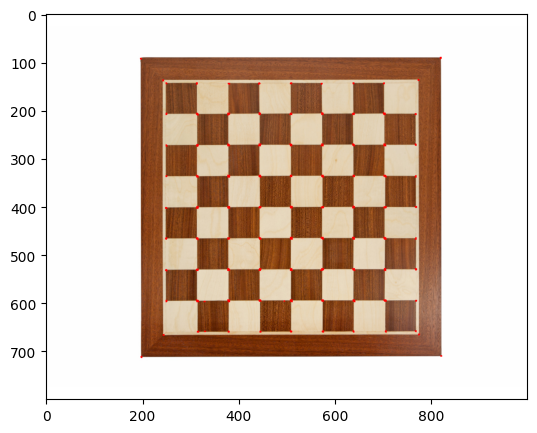

In [16]:
# No 5

chess = cv.imread('/content/drive/MyDrive/PCVK/chess-board.jpg')
chess_gray = cv.cvtColor(chess, cv.COLOR_BGR2GRAY)

gray = np.float32(chess_gray)
harris = cv.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
harris= cv.dilate(harris,None)

# Threshold for an optimal value, it may vary depending on the image.
chess[harris>0.01*harris.max()]=[0,0,255]

plt.figure(figsize=(15,5))
plt.imshow(cv.cvtColor(chess, cv.COLOR_BGR2RGB))
plt.show()

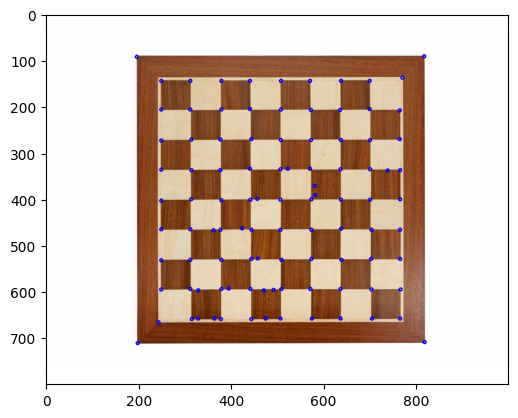

In [17]:
img_chess = cv.imread('/content/drive/MyDrive/PCVK/chess-board.jpg')
gray = cv.cvtColor(img_chess, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv.circle(img_chess,(x,y),3,255,2)

# plt.figure(figsize=(20,10))
plt.imshow(cv.cvtColor(img_chess, cv.COLOR_BGR2RGB))
plt.show()

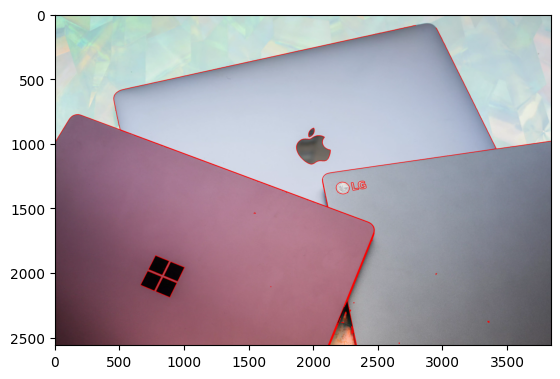

In [18]:
laptop = cv.imread('/content/drive/MyDrive/PCVK/laptop.webp')
laptop_gray = cv.cvtColor(laptop, cv.COLOR_BGR2GRAY)

edged = cv.Canny(laptop_gray, 30, 200)

contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(laptop, contours, -1, (0,0,255), 3)

plt.imshow(cv.cvtColor(laptop, cv.COLOR_BGR2RGB))
plt.show()